In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
from sqlalchemy import create_engine, inspect, func

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [12]:
# determine the last date 
last_date=session.query(Measurement.date).order_by(Measurement.date).all()
last_date
#gen list of tuples
dates_raw=pd.DataFrame(last_date)
dates_raw
#create dataframe
dates_df= pd.to_datetime(dates_raw.date)
dates_df
# get the latest date
dates_df.max()

Timestamp('2017-08-23 00:00:00')

In [13]:
#calc the dates from 1 year ago- this yr had 366 days
yr_ago=dates_df.max() - dt.timedelta(days=366)
yr_ago

Timestamp('2016-08-22 00:00:00')

In [14]:
table = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>str(yr_ago)).all()
table_df=pd.DataFrame(table,columns=['date','precipitation'])
# table_df.head()
table_df.set_index('date',inplace=True)

#table_df.describe
#set index by date then sort by date
table_df.sort_values(inplace=True, by ='date')
table_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


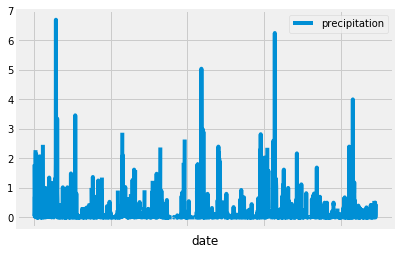

In [15]:
table_df.plot()

In [16]:
table_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
# Design a query to show how many stations are available in this dataset?
stn_cnt=session.query(Station.station).count()
stn_cnt

9

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active=session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active
# session.query(Table.column, func.sum(Table.column)).group_by(Table.column).desc().all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
h_l_a= session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
       filter(Measurement.station=='USC00519281').all()
# return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
#         filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
h_l_a

[(54.0, 85.0, 71.66378066378067)]

In [20]:
start_date = input("Please enter the start date of your vacation as YYYY-MM-DD: ")
print("You entered a start date of " + str(start_date))
end_date = input("Please enter the end date of your vacation as YYYY-MM-DD: ")
print("You entered an end date of " + str(end_date))

Please enter the start date of your vacation as YYYY-MM-DD: 2016-10-06
You entered a start date of 2016-10-06
Please enter the end date of your vacation as YYYY-MM-DD: 2016-10-27
You entered an end date of 2016-10-27


In [21]:
# >>> d_truncated = yr_ago.date(dt.year, dt.month, dt.day)
# >>> d_truncated

yr_ago.date()
# datetime.date(2011, 3, 29)

datetime.date(2016, 8, 22)

In [22]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

months_12 =session.query(Measurement.tobs).filter(Measurement.date >= yr_ago.date()).\
    filter(Measurement.station=='USC00519281').all()
# # session.query(Measurement.tobs).filter(Measurement.date > year_ago).filter(Measurement.station == active_stations[0][0]).all()
months_12

[(78.0),
 (77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 

In [23]:
mon_query=session.query(Measurement.tobs).filter(Measurement.date >= yr_ago.date()).\
    filter(Measurement.station=='USC00519281').all()

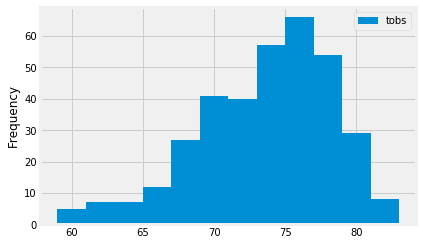

In [24]:
# %matplotlib inline
# x = np.arange(len(months_12))
# # plt.hist(x, normed=True, bins=[1,2,3,4,5,6,7,8,9,10,11,12])
# plt.hist(x,density=1, bins=12) 
months_data=pd.DataFrame(months_12,columns= ['tobs'])
months_data.head()
months_data.plot.hist(months_data, bins=12)
# plt.hist(months_12,density=1, bins=12) 
# plt.axis([50, 100, 0, 70]) 
# plt.ylabel('Frequency')
# plt.show()

In [25]:
#start oct 6,2016
#end Oct 22, 2016

# start_date='2016-10-06'
# end_date='2016-10-22'
#temp_tuple= calc_temps(start_date,end_date)
def calc_temps(start_date, end_date):
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps(start_date, end_date))

[(70.0, 77.16546762589928, 82.0)]


In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
# def calc_temps(start_date, end_date):
#     """TMIN, TAVG, and TMAX for a list of dates.
    
#     Args:
#         start_date (string): A date string in the format %Y-%m-%d
#         end_date (string): A date string in the format %Y-%m-%d
        
#     Returns:
#         TMIN, TAVE, and TMAX
#     """
    
#     return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
#         filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# # function usage example
#  print(calc_temps('2012-02-28', '2012-03-05'))

In [27]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
#start oct 6,2016
#end Oct 22, 2016

# start_date='2016-10-06'
# end_date='2016-10-22'
yr_ago_st=dt.date(2016,10,6) - dt.timedelta(days=366)
yr_ago_st
yr_ago_end=dt.date(2016,10,22) - dt.timedelta(days=366)
yr_ago_end

t_min, t_ang, t_max = calc_temps(yr_ago_st.strftime('%Y-%m-%d'),yr_ago_end.strftime('%Y-%m-%d') )[0]

print (t_min,t_ang,t_max)

66.0 75.97478991596638 84.0


C:\Users\Gogster\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


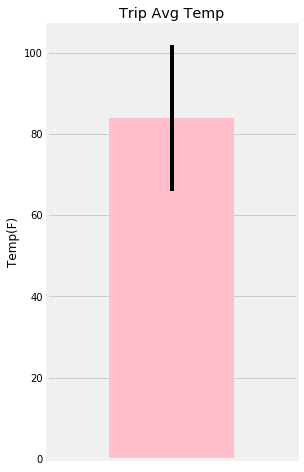

In [28]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
#using subplot to gent he 


fig, ax = plt.subplots(figsize=plt.figaspect(2.))
yerr= t_max -t_min
xpos=1


myplot=ax.bar(xpos,t_max, yerr=yerr, color='pink', alpha=1.0, align="center")
ax.set(xticks=range(xpos),xticklabels='x', title="Trip Avg Temp",ylabel='Temp(F)')
ax.margins(.5,.05)

fig.show()
# plt.bar(x_axis, users, color='r', alpha=0.5, align="center")

In [29]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rain= session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation,func.sum(Measurement.prcp)).\
                    filter(Measurement.station==Station.station).\
                    group_by(Station.station).\
                    order_by(func.sum(Measurement.prcp).desc()).all() 
pd.DataFrame(rain, columns=['Station ID', 'Station Name', 'Station Latitude', 'Station Longitude', 'Station Elevation', 'Total Rainfall'])

# session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
#         filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
#                     session.query(Measurement.station, func.count(Measurement.station)).\
# group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


,Station ID,Station Name,Station Latitude,Station Longitude,Station Elevation,Total Rainfall
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,1068.09
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,588.64
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,382.62
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,295.68
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,234.49
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,131.62
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,92.68
7,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,70.87
8,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,43.44
